# Проект "Банки — Анализ оттока клиентов"
## Материалы

- [Презентация](https://disk.yandex.ru/i/FVJ0qEThkCR-Mg)
- [Дашборд](https://public.tableau.com/views/Banks_analisis/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

## Описание проекта

**Описание**
Необходимо проанализировать клиентов регионального банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 

**Заказчик:**
Менеджер проекта.

**Стейкхолдеры:**
Менеджер проекта, менеджеры по работе с клиентами, кредитный отдел, руководство компании.

**Задача:**
- Описать портреты клиентов, которые склонны уходить из банка. Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Сформировать и проверить гипотезы, проверить зависимости показателей и влияние на отток;
- По итогам исследования подготовить презентацию в Табло и отправить в формате pdf, прикрепив ссылку на файл Табло в основном проекте.

**Цели:**
Найти характеристики (признаки) клиентов склонных  к оттоку (классифицировать). Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами и снижению оттока.
На основе регулярного отчета будут приниматься решения о мерах по снижению оттока и увеличению пользовательской активности.

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

# Загрузим датасет

In [2]:
try:
    # Загрузим датасет
    bank = pd.read_csv('/datasets/bank_dataset.csv', index_col=0)
except FileNotFoundError:
    # в случае ошибки загрузка с ЯД
    path = "https://disk.yandex.ru/d/"
    bank = pd.read_csv(path,index_col=0)

Посмотрим содержание данных датасета

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15677338 to 15671055
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             10000 non-null  int64  
 1   City              10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   Objects           10000 non-null  int64  
 5   Balance           6383 non-null   float64
 6   Products          10000 non-null  int64  
 7   CreditCard        10000 non-null  int64  
 8   Loyalty           10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [4]:
bank.describe()

,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
display(bank)

,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
userid,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1


In [6]:
# проверим значения катгориальных переменных, внесем данные в описание ниже.
bank['Gender'].unique()

array(['Ж', 'М'], dtype=object)

Датасет содержит информацию о 10 000 клиентах банка. На дубликаты проверим на следующем шаге.

**Набор данных включает следующие поля:**
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга (от 350 до 850),
- City — город ('Ярославль', 'Рыбинск', 'Ростов Великий'),
- Gender — пол ('Ж', 'М'),
- Age — возраст (от 18 до 92 лет),
- Objects — количество объектов в собственности (от 1 до 10),
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент (1, 3, 2, 4),
- CreditCard — есть ли кредитная карта (1, 0),
- Loyalty — активный клиент (1, 0),
- estimated_salary — заработная плата клиента, предположительно в месяц (от 11.58 до 199 992.48),
- Churn — ушёл или нет (1, 0).

Датасет содержит пропуски в поле Balance (около 1/3), необходимо их проверить и в случае необходимости заменить.
Названия колонок необходимо привести к единому формату: нижний регистр.

## Предобработка данных

In [7]:
# приведем колонки в единый формат
bank.columns = bank.columns.str.lower()
bank.columns

Index(['score', 'city', 'gender', 'age', 'objects', 'balance', 'products',
       'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [8]:
#проверим на явные дубликаты
print (bank.duplicated().sum())

0


In [9]:
# посчитаем долю пропущенных значений в данных с балансом
bank['balance'].isna().mean()

0.3617

In [10]:
# посмотрим количество данных с оттоком и без
bank.groupby(by = 'churn').count()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,,
0,7963,7963,7963,7963,7963,4846,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,1537,2037,2037,2037,2037


In [11]:
# выведем статистику по средним значениям наших признаков 
average = bank.groupby(['churn']).mean()
display (average)

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


Датасет содержит пропуски в данных с балансом на счете клиента. Доля пропусков около 36%. Это большой объем данных которые не следует удалять, т.к. это может повлиять на репрезентативность исследования. Можем предполоижть, что на момент снятия данных у клиентов дебетовых карт закончились деньги на счете. Оставим данные без изменений, т.к. удаление либо замена на "0" может gjвлиять на результаты исследования в дальнейшем. Будем иметь эти данные ввиду, и фильтровать, когда будем строить диаграммы распределения и рисовать портрет пользователя. 

Предобработка проведена. С датасетом можно проводить EDA.

## Исследовательский анализ данных

In [12]:
# посчитаем количество ушедших в отток
bank.groupby(['churn'])['gender'].count()

churn
0    7963
1    2037
Name: gender, dtype: int64

In [13]:
# выведем статистику по средним значениям наших признаков 
average = bank.groupby(['churn']).mean()
display (average)

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


Средние по ушедшим и оставшимся показывают небольшое различие в переменных: возраст, активность и баланс на счете. По остальным переменным средние практически схожие. Более детально посмотрим их на графиках.

In [14]:
bank.describe()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Среднее и медиана (50% персентель) по всем показателям не показывает большое различие. Несмотря на высокое стандартное отклонение по объектам `estimated_salary` и `balance`, не было влияния больших чисел на среднее, поэтому не будем удалять строки в датасете. 	

In [15]:
# созадим список с названия колонок для копирования
list (bank.columns.values)

['score',
 'city',
 'gender',
 'age',
 'objects',
 'balance',
 'products',
 'creditcard',
 'loyalty',
 'estimated_salary',
 'churn']

Построим гистограммы по количественным признакам и столбчатые диаграммы по категориальным по ушедшим и оставшимся клиентам. Списки с названиями признаков определим в переменные.

In [16]:
# количественные признаки
col_1 = ['score',
 'age',
 'balance',
 'estimated_salary',
 ]

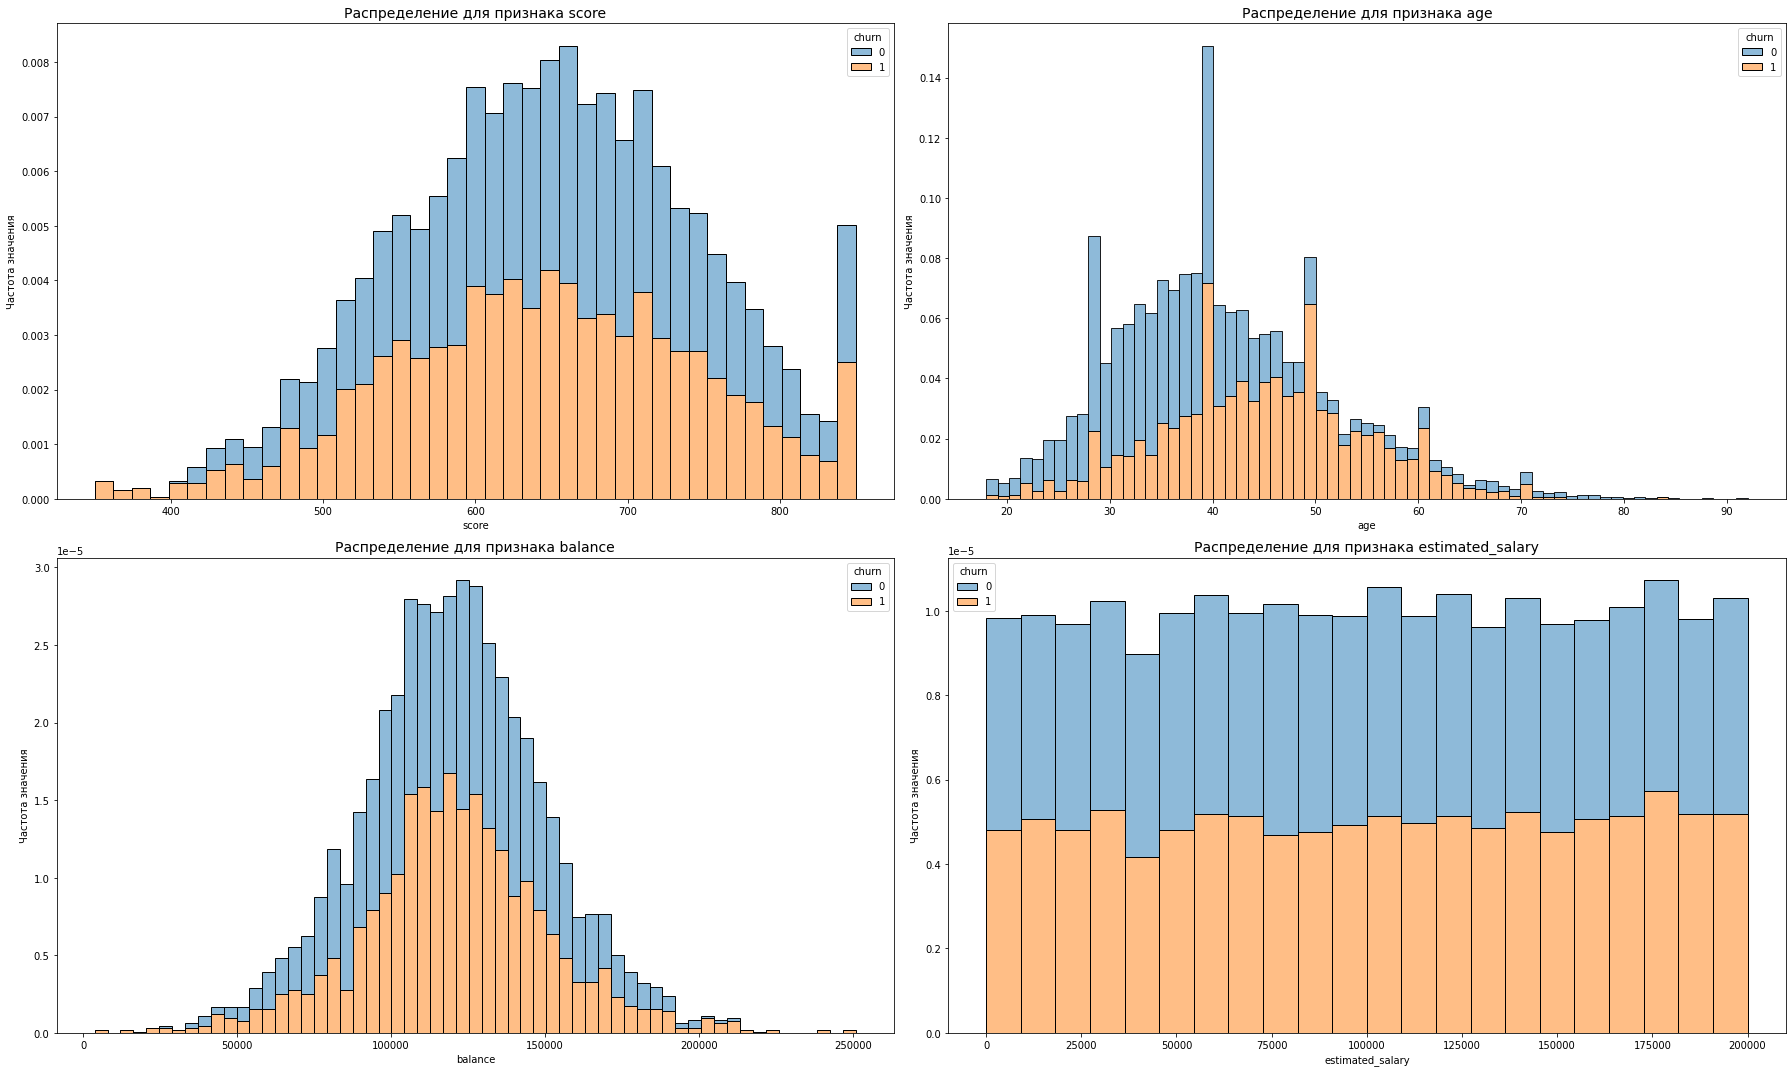

In [17]:
# разобьем Figure на 2 строки и 2 столбца, и зададим размер
fig, axes = plt.subplots(2, 2, figsize = (25, 15))
axes = axes.ravel() # возвращает сжатый до одной оси массив
#создадим временный срез датасета с НЕнулевым балансом 
bank_balance = bank.query('balance != 0')

#Построим гистгораммы
for col, ax in zip(col_1, axes):
    if col == 'balance':    # пропишем условие для колнки с балансом
        sns.histplot(data = bank_balance, x=col, hue='churn', stat='density', common_norm=False, multiple='stack', alpha=0.5, ax=ax)
        ax.set_title(f'Распределение для признака {col}', fontsize=14)
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Частота значения')
    else:
        sns.histplot(data = bank, x=col, hue='churn', stat='density', common_norm=False, multiple='stack', alpha=0.5, ax=ax)
        ax.set_title(f'Распределение для признака {col}', fontsize=14)
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Частота значения')
        
fig.tight_layout()
plt.show()

Графики с возрастом и балансом показывают нормальное распределение. График с распределением ЗП показывает, что количество пользователей в корзинах вилок ЗП примерно одинаковая. На графике c призанком score видны выбросы, которые надо проверить. Обрежем даатсет, чтобы увидеть, где возникли выбросы.

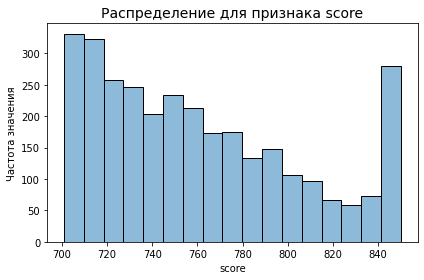

In [18]:
fig, ax = plt.subplots()
#создадим временный срез датасета  
bank_score = bank.query('score > 700')

#Построим гистгорамму
sns.histplot(data = bank_score, x='score', common_norm=False, alpha=0.5)
ax.set_title(f'Распределение для признака score', fontsize=14)
ax.set_xlabel('score')
ax.set_ylabel('Частота значения')
        
fig.tight_layout()
plt.show()

In [19]:
# вычеслим долю данных с выбросами.
print (bank.query('score > 840')['score'].count()/bank['score'].count())

0.0291


3% - это часть которую можем дропнуть без ущерба для исследования.

In [20]:
#срежем данные с выбросами в скорринге
bank = bank.query('score < 840')

Построим заново гистограммы

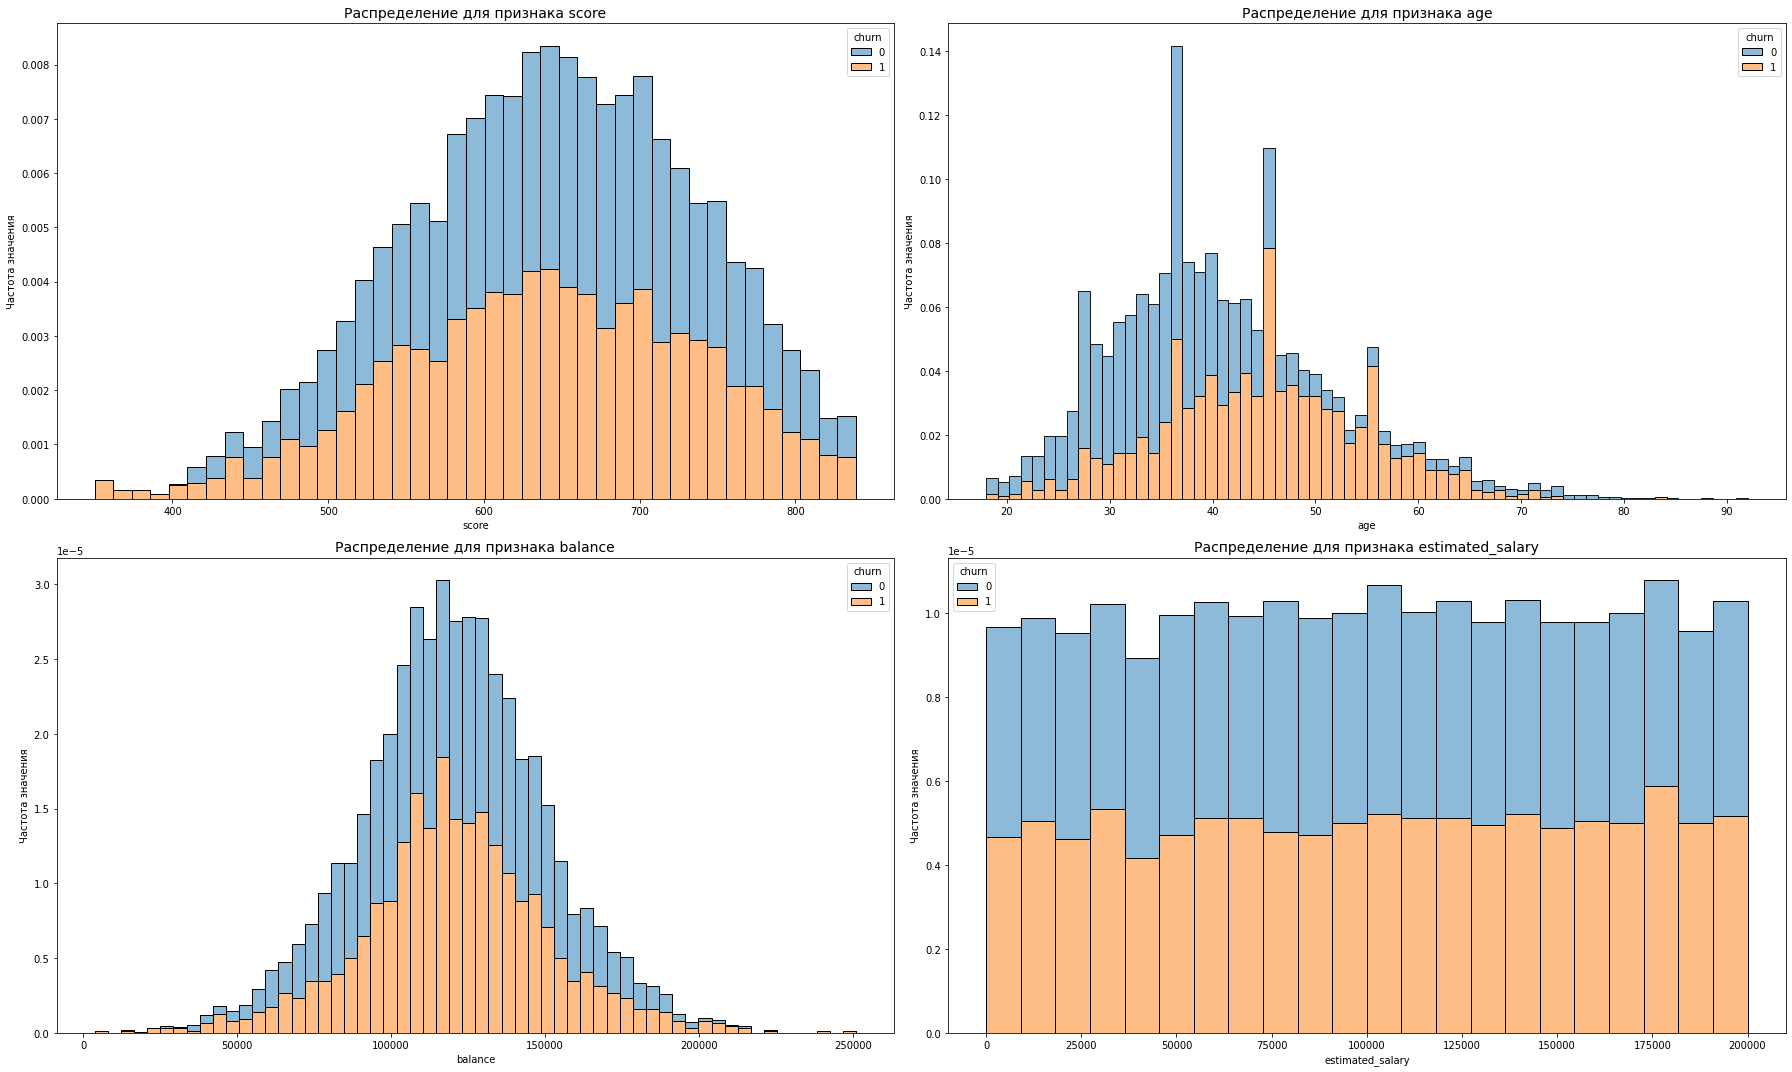

In [21]:
# разобьем Figure на 2 строки и 2 столбца, и зададим размер
fig, axes = plt.subplots(2, 2, figsize = (25, 15))
axes = axes.ravel() # возвращает сжатый до одной оси массив
#создадим временный срез датасета с НЕнулевым балансом 
bank_balance = bank.query('balance != 0')

#Построим гистгораммы
for col, ax in zip(col_1, axes):
    if col == 'balance':    # пропишем условие для колнки с балансом
        sns.histplot(data = bank_balance, x=col, hue='churn', stat='density', common_norm=False, multiple='stack', alpha=0.5, ax=ax)
        ax.set_title(f'Распределение для признака {col}', fontsize=14)
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Частота значения')
    else:
        sns.histplot(data = bank, x=col, hue='churn', stat='density', common_norm=False, multiple='stack', alpha=0.5, ax=ax)
        ax.set_title(f'Распределение для признака {col}', fontsize=14)
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Частота значения')
        
fig.tight_layout()
plt.show()

In [22]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9704 entries, 15677338 to 15671055
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             9704 non-null   int64  
 1   city              9704 non-null   object 
 2   gender            9704 non-null   object 
 3   age               9704 non-null   int64  
 4   objects           9704 non-null   int64  
 5   balance           6186 non-null   float64
 6   products          9704 non-null   int64  
 7   creditcard        9704 non-null   int64  
 8   loyalty           9704 non-null   int64  
 9   estimated_salary  9704 non-null   float64
 10  churn             9704 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 909.8+ KB


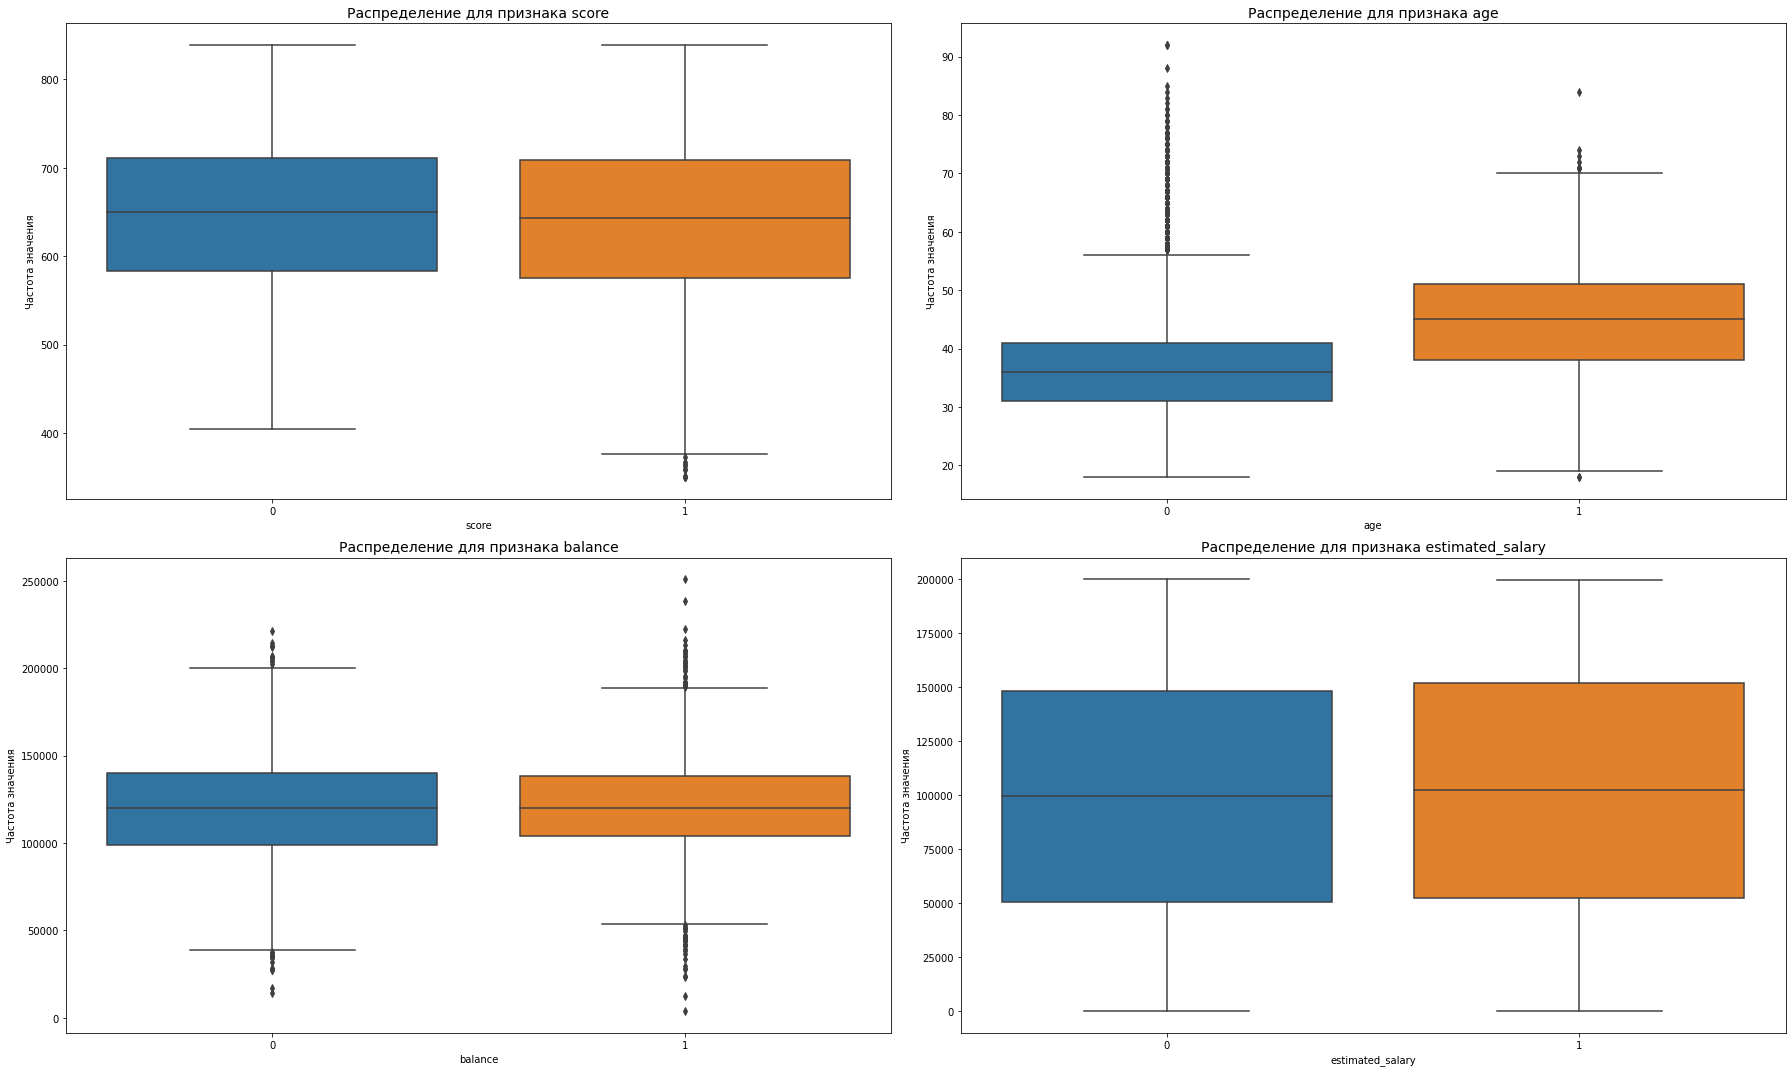

In [23]:
# разобьем Figure на 2 строки и 2 столбца, и зададим размер
fig, axes = plt.subplots(2, 2, figsize = (25, 15))
axes = axes.ravel() # возвращает сжатый до одной оси массив
#создадим временный срез датасета с НЕнулевым балансом 
bank_balance = bank.query('balance != 0')

#Построим графики "ящик с усами"
for col, ax in zip(col_1, axes):
        sns.boxplot(data = bank, y=col, x='churn', ax=ax)
        ax.set_title(f'Распределение для признака {col}', fontsize=14)
        ax.set_xlabel(f'{col}')
        ax.set_ylabel('Частота значения')
        
fig.tight_layout()
plt.show()

- Видны выбросы по возрасту по клиентам оставшимся с банком.
- Также заметны выбросы по балансу как в сторону мнимума, так и максимума.

Для удобства просмотра графиков с количественными переменными определим группы по признакам: score, age, balance, estimated_salary. 

In [24]:
# напишем функцию, которая определяет группы по скорринговым баллам
def group(feature):
    if feature <= 500:
        f = 'Score before 500'
    elif feature > 500 and feature <= 700:
        f = 'Score 500-700'
    else:
        f = 'Score after 700'
    return f
# применим метод apply к столбцу с количественной переменной и добавим новый столбец
bank['score_group'] = bank['score'].apply(group)
display(bank.head())
bank.pivot_table(index = 'score_group', columns='churn', values='loyalty',  aggfunc='count').reset_index()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_group
userid,,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,Score 500-700
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,Score 500-700
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,Score 500-700
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,Score 500-700
15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,Score 500-700


churn,score_group,0,1
0,Score 500-700,4975,1266
1,Score after 700,2260,560
2,Score before 500,491,152


In [25]:
# напишем функцию, которая определяет группы по age
def group(feature):
    if feature <= 30:
        f = 'age before 30'
    elif feature > 30 and feature <= 40:
        f = 'age 30-40'
    elif feature > 40 and feature <= 50:
        f = 'age 40-50'
    else:
        f = 'age after 50'
    return f
# применим метод apply к столбцу с количественной переменной и добавим новый столбец
bank['age_group'] = bank['age'].apply(group)
display(bank.head())
bank.pivot_table(index = 'age_group', columns='churn', values='loyalty',  aggfunc='count').reset_index()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_group,age_group
userid,,,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,Score 500-700,age 40-50
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,Score 500-700,age 40-50
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,Score 500-700,age 40-50
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,Score 500-700,age 30-40
15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,Score 500-700,age 40-50


churn,age_group,0,1
0,age 30-40,3782,523
1,age 40-50,1494,767
2,age after 50,681,541
3,age before 30,1769,147


In [26]:
# напишем функцию, которая определяет группы по balance
def group(feature):
    if feature <= 50000:
        f = 'balance before 50 t.r.'
    elif feature > 50000 and feature <= 100000:
        f = 'balance 50-100 t.r.'
    elif feature > 100000 and feature <= 150000:
        f = 'balance 100-150 t.r.'
    elif feature > 150000:
        f = 'balance after 150 t.r.'   
    else:
        f = 'balance empty'
    return f
# применим метод apply к столбцу с количественной переменной и добавим новый столбец
bank['balance_group'] = bank['balance'].apply(group)
display(bank.head())
bank.pivot_table(index = 'balance_group', columns='churn', values='loyalty',  aggfunc='count').reset_index()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_group,age_group,balance_group
userid,,,,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,Score 500-700,age 40-50,balance empty
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,Score 500-700,age 40-50,balance 50-100 t.r.
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,Score 500-700,age 40-50,balance after 150 t.r.
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,Score 500-700,age 30-40,balance empty
15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,Score 500-700,age 40-50,balance 100-150 t.r.


churn,balance_group,0,1
0,balance 100-150 t.r.,2755,962
1,balance 50-100 t.r.,1170,285
2,balance after 150 t.r.,722,218
3,balance before 50 t.r.,48,26
4,balance empty,3031,487


In [27]:
# напишем функцию, которая определяет группы по estimated_salary
def group(feature):
    if feature <= 50000:
        f = 'salary before 50 t.r.'
    elif feature > 50000 and feature <= 100000:
        f = 'salary 50-100 t.r.'
    elif feature > 100000 and feature <= 150000:
        f = 'salary 100-150 t.r.'
    else:
        f = 'salary after 150 t.r.'
    return f
# применим метод apply к столбцу с количественной переменной и добавим новый столбец
bank['salary_group'] = bank['estimated_salary'].apply(group)
display(bank.head())
bank.pivot_table(index = 'salary_group', columns='churn', values='loyalty',  aggfunc='count').reset_index()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_group,age_group,balance_group,salary_group
userid,,,,,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,Score 500-700,age 40-50,balance empty,salary 100-150 t.r.
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,Score 500-700,age 40-50,balance 50-100 t.r.,salary 100-150 t.r.
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,Score 500-700,age 40-50,balance after 150 t.r.,salary 100-150 t.r.
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,Score 500-700,age 30-40,balance empty,salary 50-100 t.r.
15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,Score 500-700,age 40-50,balance 100-150 t.r.,salary 100-150 t.r.


churn,salary_group,0,1
0,salary 100-150 t.r.,1982,509
1,salary 50-100 t.r.,1977,489
2,salary after 150 t.r.,1863,510
3,salary before 50 t.r.,1904,470


In [28]:
list (bank.columns)

['score',
 'city',
 'gender',
 'age',
 'objects',
 'balance',
 'products',
 'creditcard',
 'loyalty',
 'estimated_salary',
 'churn',
 'score_group',
 'age_group',
 'balance_group',
 'salary_group']

Построим столбчатые диаграммы для категориальных признаков, включая вновь определенные.

In [29]:
# категориальные признаки
col_2 = ['city',
 'gender',
 'objects',
 'products',
 'creditcard',
 'loyalty',
 'score_group',
 'age_group',
 'balance_group',
 'salary_group'
 ]

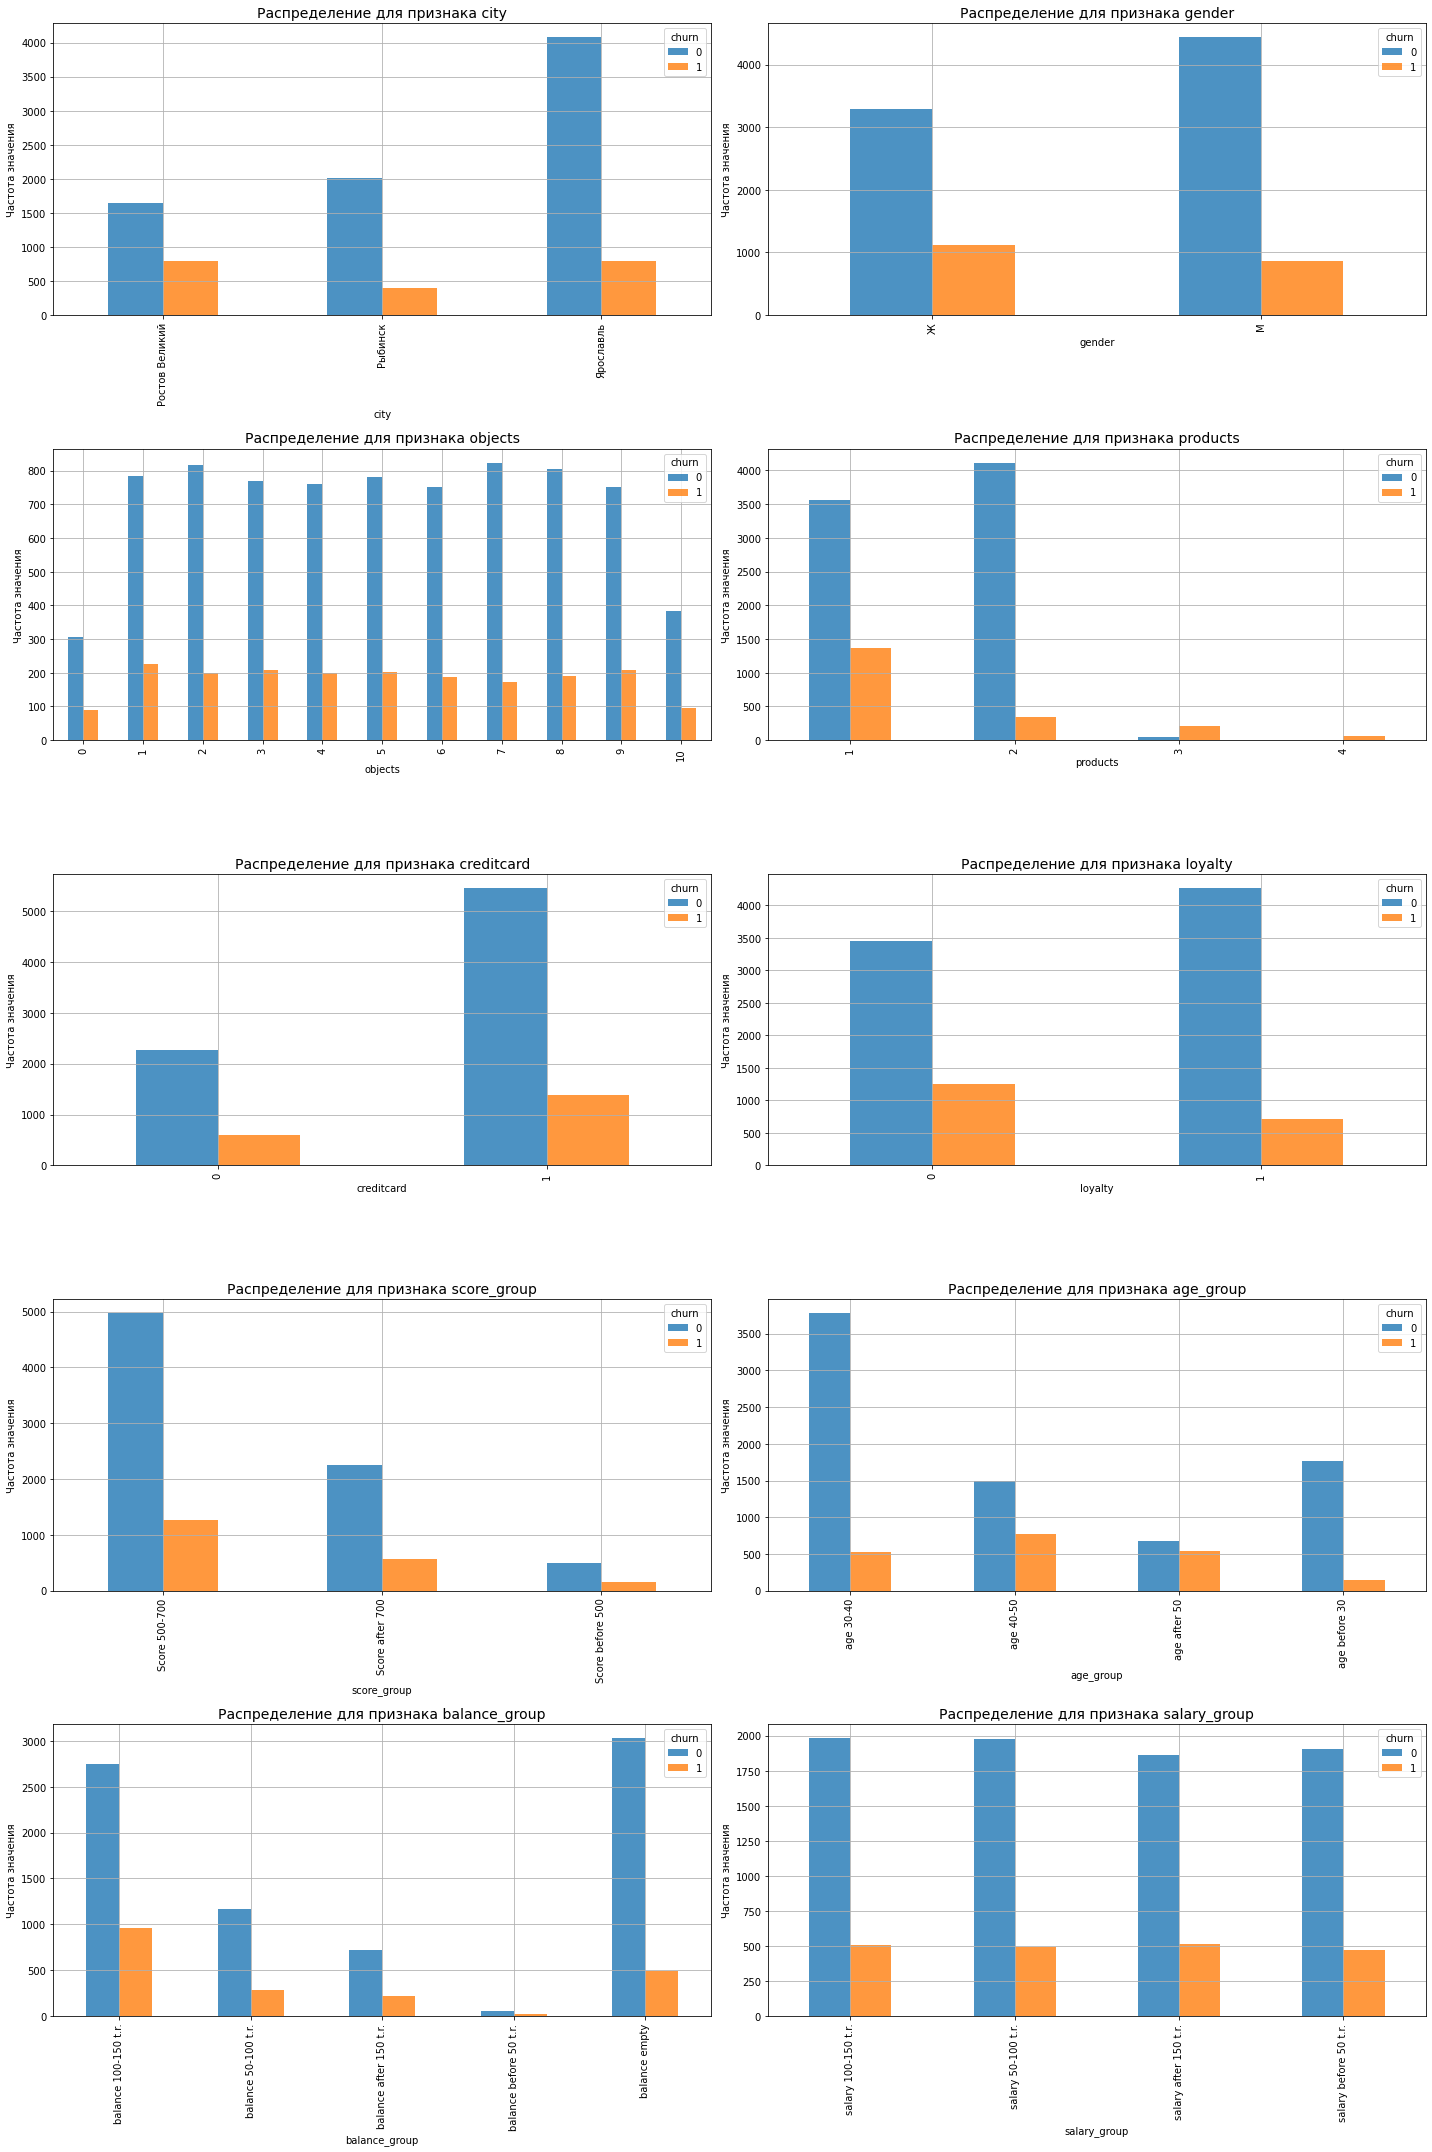

In [30]:
# разобьем Figure на 3 строки и 2 столбца, и зададим размер
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
axes = axes.ravel() # возвращает сжатый до одной оси массив

#Построим столбчатые диаграммы
for col, ax in zip(col_2, axes):
    bank.pivot_table(index = col, columns='churn', values='age',  aggfunc='count').reset_index()\
    .plot(kind = 'bar', x=col, alpha=0.8, grid=True, width=0.5, ax=ax)
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Частота значения')
    ax.set_title(f'Распределение для признака {col}', fontsize=14)

fig.tight_layout()
plt.show()

Построим матрицу корреляций и тепловую карту корреляций

In [32]:
# преобразуем категориальные переменные в индикаторные переменные.
df = pd.get_dummies(bank,  columns=['city', 'gender'])

In [33]:
#вычислим матрицу корреляций
cm = df.corr()
cm

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
score,1.000000,-0.005182,0.003530,-0.001677,0.014890,-0.005516,0.025271,-0.000549,-0.028658,0.003443,0.008009,-0.009903,-0.000312,0.000312
age,-0.005182,1.000000,-0.008860,-0.012936,-0.028284,-0.010767,0.089156,-0.006190,0.282947,0.048305,-0.003155,-0.039131,0.029289,-0.029289
objects,0.003530,-0.008860,1.000000,0.008762,0.018184,0.021819,-0.027705,0.008031,-0.016268,0.002934,0.004124,-0.006105,-0.014824,0.014824
balance,-0.001677,-0.012936,0.008762,1.000000,0.000139,0.010032,-0.022820,-0.001187,0.017061,-0.002110,-0.000990,0.002904,-0.026506,0.026506
products,0.014890,-0.028284,0.018184,0.000139,1.000000,0.001923,0.009113,0.017118,-0.048219,-0.009567,0.008526,0.000923,0.019878,-0.019878
creditcard,-0.005516,-0.010767,0.021819,0.010032,0.001923,1.000000,-0.012661,-0.010761,-0.004292,0.013792,-0.014526,0.000600,-0.008757,0.008757
loyalty,0.025271,0.089156,-0.027705,-0.022820,0.009113,-0.012661,1.000000,-0.012639,-0.152392,-0.020135,0.014556,0.004871,-0.022550,0.022550
estimated_salary,-0.000549,-0.006190,0.008031,-0.001187,0.017118,-0.010761,-0.012639,1.000000,0.014310,0.012141,-0.006218,-0.005148,0.010590,-0.010590
churn,-0.028658,0.282947,-0.016268,0.017061,-0.048219,-0.004292,-0.152392,0.014310,1.000000,0.174582,-0.053314,-0.105213,0.109410,-0.109410
city_Ростов Великий,0.003443,0.048305,0.002934,-0.002110,-0.009567,0.013792,-0.020135,0.012141,0.174582,1.000000,-0.332141,-0.579536,0.023380,-0.023380


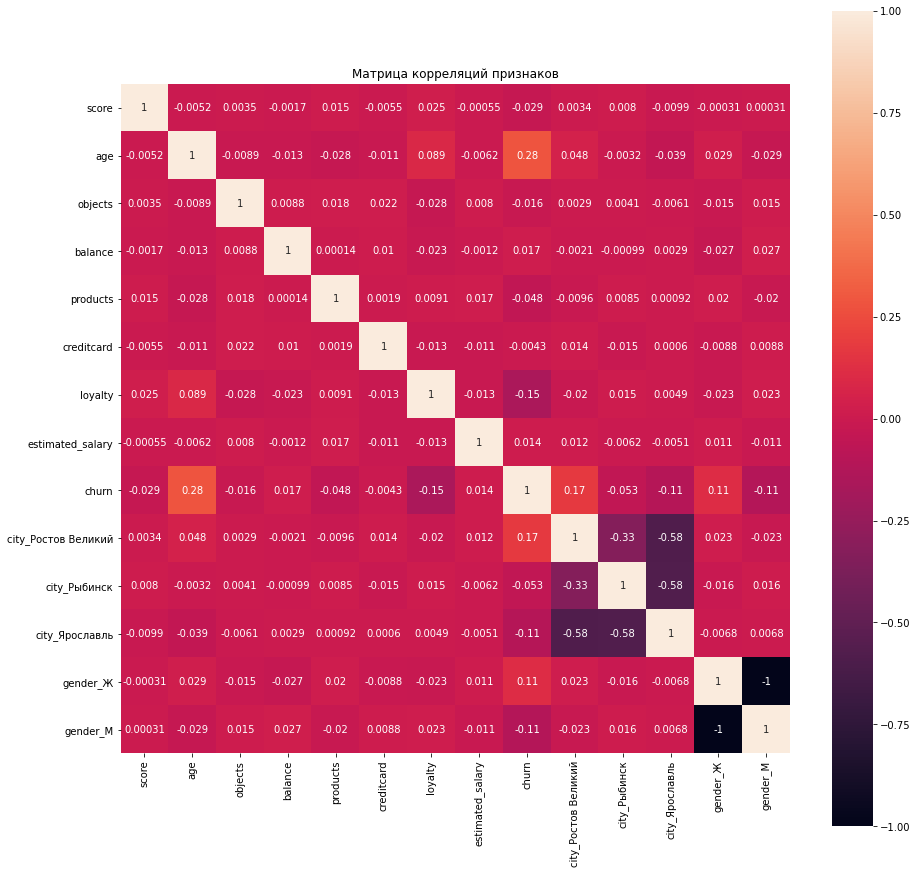

In [34]:
fig, ax = plt.subplots()
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True) 
plt.title('Матрица корреляций признаков')
fig.set_figheight(15)  # высота
fig.set_figwidth(15)  # ширина 
plt.show()

Не выявлены зависимости между величинами датасета.

In [35]:
list(bank.columns)

['score',
 'city',
 'gender',
 'age',
 'objects',
 'balance',
 'products',
 'creditcard',
 'loyalty',
 'estimated_salary',
 'churn',
 'score_group',
 'age_group',
 'balance_group',
 'salary_group']

**Создадим портреты пользователей склонных к оттоку и лояльных клиентов.**

**Клиенты склонные к оттоку:**
- Клиенты, проживающие в Ростов.Великом, примерно в равных долях уходят и остаются.
- Преимущественно женщины
- Клиенты без недвижимости 
- Клиенты пользующиеся только 1м продуктом
- Не активный клиент
- Клиенты имеющие низкий скорринговый балл (менее 500)
- Клиенты старше 40 лет (выше 50 лет - высокий риск оттока)
- Клиенты с балансом более 100 т.р.

**Лояльные клиенты:**
- Клиенты Ярославля и Рыбинска реже уходят.
- Преимущественно мужчины
- Клиенты имеющие недвижимость
- Клиенты имеющие в портфеле 2 продукта банка
- Активный клиент (множество транзакций, участие в акциях банка, пользующийся услугами)
- Клиенты со скорринговым баллос выше 500
- Клиенты моложе 40 лет
- Клиенты с пустым балансом

## Проверка гипотез

**Сформулируем гипотезы:**

1. гипотеза №1: клиенты с низкой ЗП чаще уходят из банка
2. гипотеза №2: клиенты с низким скорринговым баллом чаще уходят из банка

**Для проверки 1-й гипотезы разобъем клиентов на 3 группы:**
- ЗП до 70 000 руб. - `низкая`,
- ЗП от 70 000 до 120 000 руб. - `средняя`,
- ЗП от 120 000 и выше - `высокая`.

In [36]:
# напишем функцию, которая определяет группы по estimated_salary
def group(feature):
    if feature <= 70000:
        f = 'низкая'
    elif feature > 70000 and feature <= 120000:
        f = 'средняя'
    else:
        f = 'высокая'
    return f
# перезапишем столбец
bank['salary_group'] = bank['estimated_salary'].apply(group)
display(bank.head())

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_group,age_group,balance_group,salary_group
userid,,,,,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,Score 500-700,age 40-50,balance empty,средняя
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,Score 500-700,age 40-50,balance 50-100 t.r.,средняя
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,Score 500-700,age 40-50,balance after 150 t.r.,средняя
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,Score 500-700,age 30-40,balance empty,средняя
15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,Score 500-700,age 40-50,balance 100-150 t.r.,высокая


In [37]:
# посчитаем долю клиентов с оттоком во всех группах
bank.groupby(by = 'salary_group')['churn'].mean()

salary_group
высокая    0.210091
низкая     0.200179
средняя    0.199035
Name: churn, dtype: float64

In [38]:
# посчитаем среднее значение баллов по ушедшим и лояльным клиентам в зарплатных группах
bank.pivot_table(index = 'salary_group', columns='churn', values='score',  aggfunc=['mean']).reset_index()

salary_group        mean            
churn                        0           1
0          высокая  646.099574  636.695813
1           низкая  645.599403  645.640835
2          средняя  645.646586  634.949495

In [39]:
# посчитаем среднее значение возраста по ушедшим и лояльным клиентам в зарплатных группах
bank.pivot_table(index = 'salary_group', columns='churn', values='age',  aggfunc=['mean']).reset_index()

salary_group       mean           
churn                       0          1
0          высокая  37.090403  44.905172
1           низкая  37.548303  44.622951
2          средняя  37.739960  44.787879

In [40]:
# посчитаем среднее значение баланса по ушедшим и лояльным клиентам в зарплатных группах
bank.pivot_table(index = 'salary_group', columns='churn', values='balance',  aggfunc=['mean']).reset_index()

salary_group           mean               
churn                           0              1
0          высокая  119756.702912  120503.928029
1           низкая  119290.587685  122076.439201
2          средняя  119711.492109  119440.937170

**Выводы:**
- доля оттока среди клиентов в категории "низкая" приблизительно равна долям в остальных группах (около 20%), 
- среднее значение скорринговых баллов у лояльных клиентов в категории "низкая" выше чем в других группах,
- средний возраст в группах не отличается
- средний баланс у клиентов с низкой ЗП выше чем в других группах.

Построим столбчатые диаграммы по остальным признакам по каждой категории.

In [41]:
# список признаков
col_3 = ['city',
 'gender',
 'objects',
 'products',
 'creditcard',
 'loyalty',
  ]

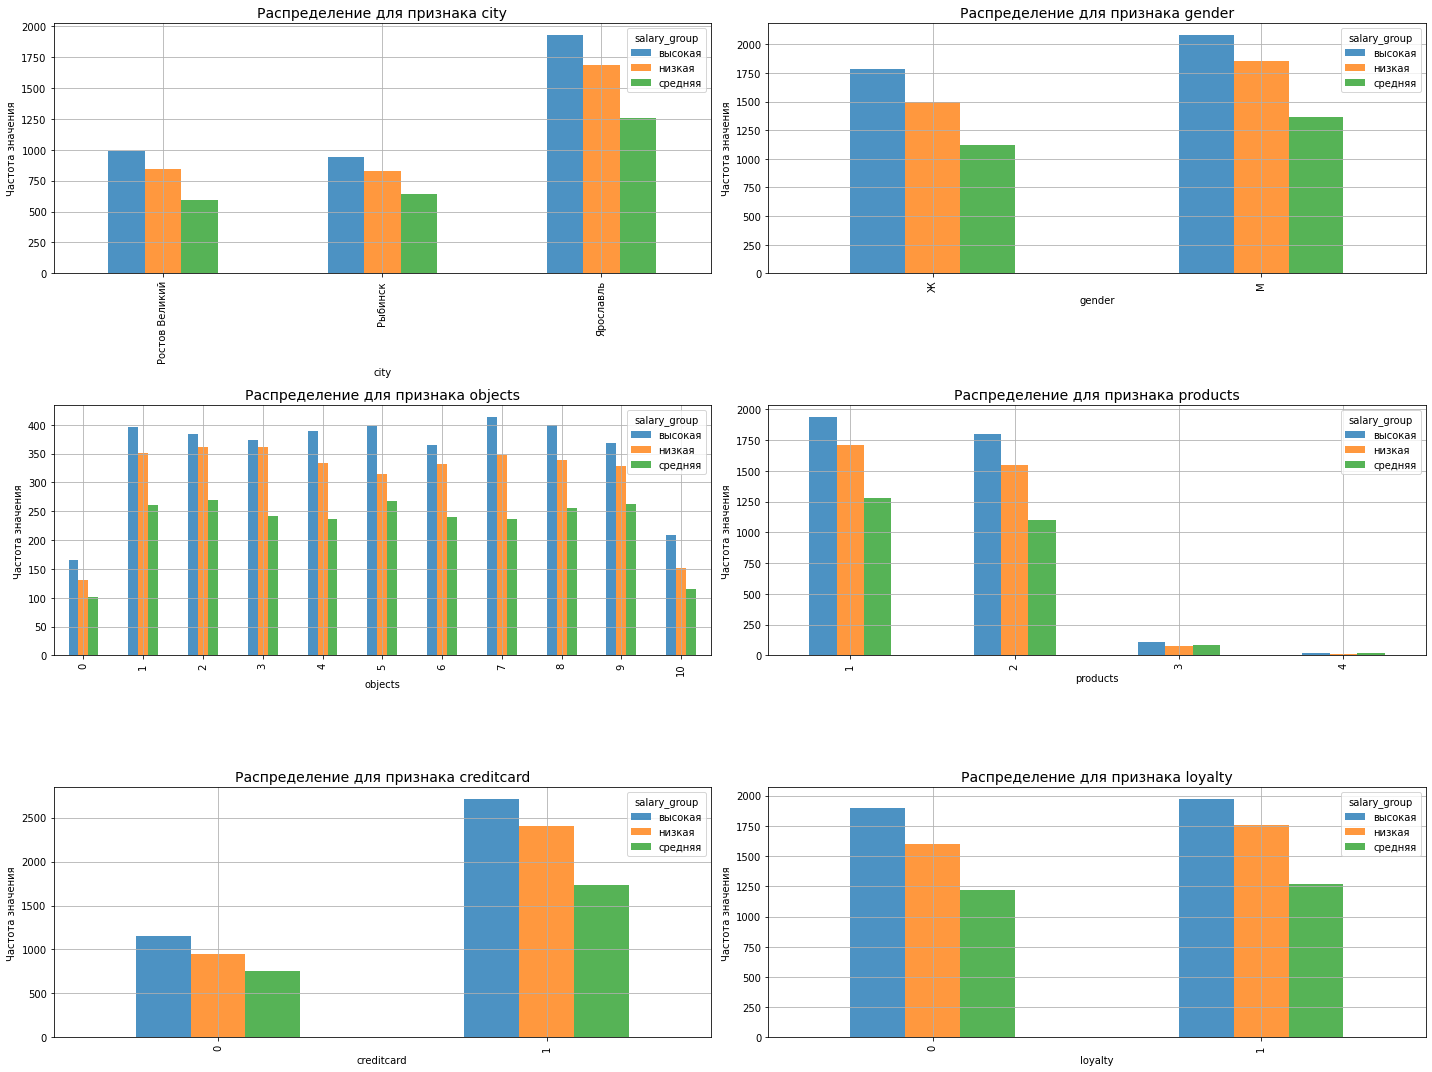

In [42]:
# разобьем Figure на 3 строки и 2 столбца, и зададим размер
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
axes = axes.ravel() # возвращает сжатый до одной оси массив

#Построим столбчатые диаграммы
for col, ax in zip(col_3, axes):
    bank.pivot_table(index = col, columns='salary_group', values='age',  aggfunc='count').reset_index()\
    .plot(kind = 'bar', x=col, alpha=0.8, grid=True, width=0.5, ax=ax)
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Частота значения')
    ax.set_title(f'Распределение для признака {col}', fontsize=14)

fig.tight_layout()
plt.show()

Заметных отличий по категориальным признакам среди когорт с уровнем ЗП не выявлено.

**Гипотеза не подтвердилась. Клиенты с низкой, средней и высокой ЗП  уходят из банка с одинаковой частотой.**

**Для проверки 2-й гипотезы разобъем клиентов на 3 группы:**
- Кредитный рейтинг до 500 б. - `низкий`,
- Кредитный рейтинг от 500 до 700 б. - `средний`,
- Кредитный рейтинг от 700 б. и выше - `высокий`.

In [43]:
# напишем функцию, которая определяет группы по скорринговым баллам
def group(feature):
    if feature <= 500:
        f = 'низкий'
    elif feature > 500 and feature <= 700:
        f = 'средний'
    else:
        f = 'высокий'
    return f
# применим метод apply к столбцу с количественной переменной и добавим новый столбец
bank['score_group'] = bank['score'].apply(group)
display(bank.head())

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_group,age_group,balance_group,salary_group
userid,,,,,,,,,,,,,,,
15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,средний,age 40-50,balance empty,средняя
15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний,age 40-50,balance 50-100 t.r.,средняя
15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний,age 40-50,balance after 150 t.r.,средняя
15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,средний,age 30-40,balance empty,средняя
15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,средний,age 40-50,balance 100-150 t.r.,высокая


In [44]:
# посчитаем долю клиентов с оттоком во всех группах
bank.groupby(by = 'score_group')['churn'].mean()

score_group
высокий    0.198582
низкий     0.236392
средний    0.202852
Name: churn, dtype: float64

In [45]:
# посчитаем среднее значение баллов по ушедшим и лояльным клиентам в группах
bank.pivot_table(index = 'score_group', columns='churn', values='score',  aggfunc=['mean']).reset_index()

score_group        mean            
churn                       0           1
0         высокий  751.703982  752.050000
1          низкий  467.128310  452.032895
2         средний  615.338894  611.899684

In [46]:
# посчитаем среднее значение возраста по ушедшим и лояльным клиентам в оценочных группах
bank.pivot_table(index = 'score_group', columns='churn', values='age',  aggfunc=['mean']).reset_index()

score_group       mean           
churn                      0          1
0         высокий  37.334071  44.810714
1          низкий  36.898167  45.578947
2         средний  37.505528  44.670616

In [47]:
# посчитаем среднее значение баланса по ушедшим и лояльным клиентам в оценочных группах
bank.pivot_table(index = 'score_group', columns='churn', values='balance',  aggfunc=['mean']).reset_index()

score_group           mean               
churn                          0              1
0         высокий  119420.089463  121443.356580
1          низкий  122210.069935  120263.300439
2         средний  119390.137586  120555.222256

In [48]:
# посчитаем среднее значение ЗП по ушедшим и лояльным клиентам в оценочных группах
bank.pivot_table(index = 'score_group', columns='churn', values='estimated_salary',  aggfunc=['mean']).reset_index()

score_group           mean               
churn                          0              1
0         высокий  100728.912204   98828.538536
1          низкий  101917.769980  109415.522303
2         средний   99009.833895  102100.898341

**Выводы:**
- доля оттока среди клиентов в категории "низкий" на 4% пп. выше чем в остальных группах. Что составляет значительную разницу от других групп.
- средний баланс в группах среди ушедших клиентов не отличается,
- средний возраст в группах не отличается
- среднее значение ЗП у клиентов с низким рейтингом ушедшим в отток выше чем в других группах.

Построим столбчатые диаграммы по остальным признакам по каждой категории.

Построим столбчатые диаграммы по остальным признакам по каждой категории.

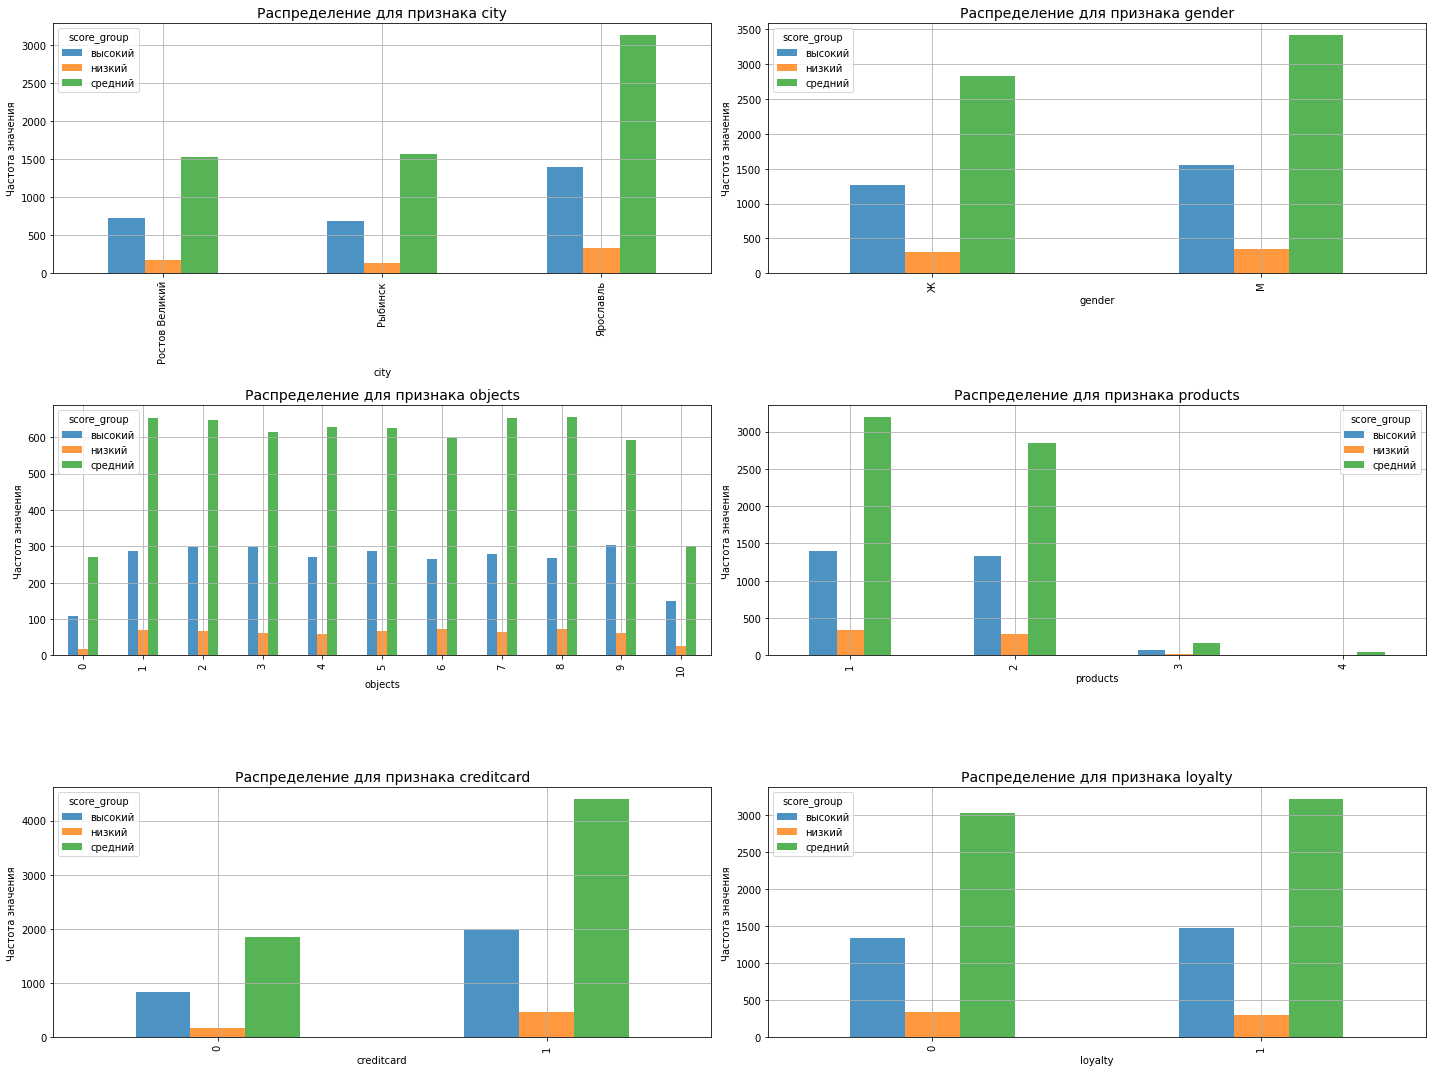

In [49]:
# разобьем Figure на 3 строки и 2 столбца, и зададим размер
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
axes = axes.ravel() # возвращает сжатый до одной оси массив

#Построим столбчатые диаграммы
for col, ax in zip(col_3, axes):
    bank.pivot_table(index = col, columns='score_group', values='age',  aggfunc='count').reset_index()\
    .plot(kind = 'bar', x=col, alpha=0.8, grid=True, width=0.5, ax=ax)
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Частота значения')
    ax.set_title(f'Распределение для признака {col}', fontsize=14)

fig.tight_layout()
plt.show()

Заметных отличий по категориальным признакам среди когорт с уровнем рейтинга не выявлено.

**Гипотеза подтвердилась. Клиенты с низким скорринговым баллом чаще уходят из банка.**

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. **Применим критерий Манна-Уитни.** Воспользуемся методом st.mannwhitneyu()

**Сформулируем гипотезу №1:**
- Нулевая гипотеза: различий в зарплатах между клиентами, кто ушел и теми, кто остался нет.
- Альтернативная гипотеза: различия в зарплатах между клиентами, кто ушел и теми, кто остался есть.

In [50]:
# выделим 2 списка с доходами для теста
churn_yes = list(bank.query('churn == 1')['estimated_salary'])
churn_not = list(bank.query('churn == 0')['estimated_salary'])

In [51]:
alpha = 0.05  # критический уровень статистической значимости
results = st.mannwhitneyu(churn_yes, churn_not)

In [52]:
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.15841441605187911
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Сформулируем гипотезу №2:**
- Нулевая гипотеза: различий в скорринговом балле между клиентами, кто ушел и теми, кто остался нет. 
- Альтернативная гипотеза: различия в скорринговом балле между клиентами, кто ушел и теми, кто остался есть.

In [53]:
# выделим 2 списка с баллами для теста
churn_yes = list(bank.query('churn == 1')['score'])
churn_not = list(bank.query('churn == 0')['score'])

In [54]:
alpha = 0.05  # критический уровень статистической значимости
results = st.mannwhitneyu(churn_yes, churn_not)

In [55]:
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.017656317678938875
Отвергаем нулевую гипотезу: разница статистически значима


**Выводы исследования гипотез, сделанные ранее, подтверждаются статистическими методами проверки гипотез:**
- Различий в доходах между лояльными клиентами и ушедшими нет.
- Скорринговый балл у лояльных клиентов и ушедших отличается.

## Выводы

**Общие характеристики клиентов склонных к оттоку:**
- Клиенты, проживающие в Ростов.Великом, примерно в равных долях уходят и остаются.
- Преимущественно женщины
- Клиенты без недвижимости 
- Клиенты пользующиеся только 1м продуктом
- Не активный клиент
- Клиенты имеющие низкий скорринговый балл (менее 500)
- Клиенты старше 40 лет (выше 50 лет - высокий риск оттока)
- Клиенты с балансом более 100 т.р.

**Рекомендации по повышению качества работы с рисковыми клиентами и снижению оттока:**
- предлагать клиентам продукты Банка с длительным бесплатным периодом (от года),
- клиентам старше 40 лет делать таргетированные предложения, уделять больше внимания при личном обслужтивании в Банках, 
- увеличить количество промо-предложений клиентам по использованию других сервисов, услуг и продуктов банка (преимущественно клиентам с одним продуктом).
- разработать "вкусные" продукты и фичи для клиентов женщин и клиентов предпенсионного возраста.
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента и применять к клиентам в группе риска повышенное внимание через различные программы лояльности.